In [2]:
import sklearn
print(sklearn.__version__)

1.0


In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
digit_df = load_digits()

In [5]:
print(dir(digit_df))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [6]:
print(digit_df.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [8]:
X = digit_df.data
y = digit_df.target
print(digit_df.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [12]:
import pandas as pd
df = pd.DataFrame(data = X, columns=digit_df.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

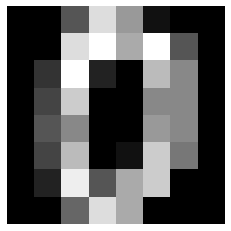

In [22]:
plt.imshow(X[0].reshape(8,8), cmap='gray')
plt.axis(False)
plt.show()

In [24]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [50]:
def train_and_eval_classifier_model(clf_model):
    
    model = clf_model()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(f"---------{type(model).__name__}---------")
    print(classification_report(y_test,y_pred))
    

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [52]:
clfs = [DecisionTreeClassifier, RandomForestClassifier, SVC,
        SGDClassifier, LogisticRegression]

for clf in clfs:
    train_and_eval_classifier_model(clf)

---------DecisionTreeClassifier---------
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.88      0.79      0.83        28
           2       0.83      0.76      0.79        33
           3       0.73      0.88      0.80        34
           4       0.82      0.89      0.85        46
           5       0.95      0.87      0.91        47
           6       0.85      0.97      0.91        35
           7       0.81      0.88      0.85        34
           8       0.88      0.73      0.80        30
           9       0.85      0.82      0.84        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360

---------RandomForestClassifier---------
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98       

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


각 분류기들에 대해 classification report를 확인해보게 되면, 대체적으로 각 레이블들에 대해 준수한 성능을 보이는 것을 확인할 수 있다. Decision Tree모델의 경우 가장 좋지 않은 성능을 보여주는 것을 확인하였다. 

만약 성능이 좋지 않게 나올 경우, 추가적인 분석이 필요하다면, f1_score를 개별 클래스들에 대해 확인해보면 좀 더 유의미한 원인을 파악할 수 있을 것으로 사료된다.